# Pokémon Data Science

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy

In [121]:
# Pokemon data
df = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemons.csv', index_col=[0])
# Type chart
df_types = pd.read_csv('https://raw.githubusercontent.com/Fnor-BE/pokemon-data-scraper/main/pokemon-type-chart.csv', index_col=[0])

In [122]:
TYPE_COLORS = {
    'bug': '#A6B91A',
    'dark': '#705746',
    'dragon': '#6F35FC',
    'electric': '#F7D02C',
    'fairy': '#D685AD',
    'fighting': '#C22E28',
    'fire': '#EE8130',
    'flying': '#A98FF3',
    'ghost': '#735797',
    'grass': '#7AC74C',
    'ground': '#E2BF65',
    'ice': '#96D9D6',
    'normal': '#A8A77A',
    'poison': '#A33EA1',
    'psychic': '#F95587',
    'rock': '#B6A136',
    'steel': '#B7B7CE',
    'water': '#6390F0'
}
type_color_palette = sns.color_palette(TYPE_COLORS.values(), len(TYPE_COLORS))

In [123]:
df_types

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fighting,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


# Sorting functions

## Type tuples
Since Water/Ice is the same as Ice/Water, we'll create a tuple with the types in alphabetical order.
Pure types will be noted Water/Water.

In [99]:
mask = df['type2'].isna()
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

mask = (~df['type2'].isna()) & (df['type1'] < df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type1']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type2']

mask = (~df['type2'].isna()) & (df['type1'] > df['type2'])
df.loc[mask, 'type1_sorted'] = df.loc[mask, 'type2']
df.loc[mask, 'type2_sorted'] = df.loc[mask, 'type1']

df['type_tuple'] = '(' + df['type1_sorted'] + ', ' + df['type2_sorted'] + ')'

## Is Mega Evolution

In [119]:
df['is_mega'] = 0
df.loc[ df['form'].str.contains('mega', case=False, na=False), 'is_mega' ] = 1

KeyError: 'form'

## Remove duplicates

In [101]:
# df_mega = 
df_unique_types = df.drop_duplicates(subset=['name', 'type1', 'type2'])
df_unique_types = df_unique_types[ df_unique_types['is_mega'] == 0 ]
df_unique_types

,id,name,form,gen,type1,type2,stats,hp,attack,defense,...,evo_1_details,evo_2,evo_3,evo_2_details,evo_stage,evo_is_final,type1_sorted,type2_sorted,type_tuple,is_mega
0,1,Bulbasaur,NaN,1,grass,poison,318,45,49,49,...,Level 16,Ivysaur,Venusaur,Level 32,1.0,0,grass,poison,"(grass, poison)",0
1,2,Ivysaur,NaN,1,grass,poison,405,60,62,63,...,Level 16,Ivysaur,Venusaur,Level 32,2.0,0,grass,poison,"(grass, poison)",0
2,3,Venusaur,NaN,1,grass,poison,525,80,82,83,...,Level 16,Ivysaur,Venusaur,Level 32,3.0,1,grass,poison,"(grass, poison)",0
3,4,Charmander,NaN,1,fire,NaN,309,39,52,43,...,Level 16,Charmeleon,Charizard,Level 36,1.0,0,fire,fire,"(fire, fire)",0
4,5,Charmeleon,NaN,1,fire,NaN,405,58,64,58,...,Level 16,Charmeleon,Charizard,Level 36,2.0,0,fire,fire,"(fire, fire)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1021,Raging Bolt,NaN,9,electric,dragon,590,125,73,91,...,NaN,NaN,NaN,NaN,1.0,1,dragon,electric,"(dragon, electric)",0
1193,1022,Iron Boulder,NaN,9,rock,psychic,590,90,120,80,...,NaN,NaN,NaN,NaN,1.0,1,psychic,rock,"(psychic, rock)",0
1194,1023,Iron Crown,NaN,9,steel,psychic,590,90,72,100,...,NaN,NaN,NaN,NaN,1.0,1,psychic,steel,"(psychic, steel)",0
1195,1024,Terapagos,Normal Form,9,normal,NaN,450,90,65,85,...,NaN,NaN,NaN,NaN,1.0,1,normal,normal,"(normal, normal)",0


## Pokemons by type

In [118]:
def get_pokemon_by_types(type1: str, type2: str=None, pure_type=False, data=None):
    if data is None:
        data = df
    mask1 = data['type1'] == type1
    if type2 is not None:
        mask1 &= data['type2'] == type2
    
    mask2 = data['type2'] == type1
    if type2 is not None:
        mask2 &= data['type1'] == type2
    
    mask = mask1 | mask2
    if pure_type:
        mask &= data['type2'].isna()
        
    return data.loc[mask,:]

test = get_pokemon_by_types('normal')['id'].count()
test2 = get_pokemon_by_types('water')['id'].count()
print(test, test2)

KeyError: 'type1'

# Type Study

In [103]:
final_evos = df_unique_types[ df_unique_types['evo_is_final'] == 1 ]
type_distribution = final_evos.groupby(['type1', 'type2'], dropna=False)['id'].count().unstack()
type_distribution

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water,NaN
type1,,,,,,,,,,,,,,,,,,,
bug,NaN,1.0,NaN,2.0,1.0,4.0,1.0,9.0,1.0,3.0,1.0,NaN,NaN,5.0,2.0,3.0,6.0,1.0,6.0
dark,NaN,NaN,2.0,NaN,1.0,1.0,2.0,5.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,NaN,9.0
dragon,NaN,1.0,NaN,1.0,NaN,1.0,1.0,4.0,1.0,NaN,2.0,2.0,1.0,NaN,2.0,NaN,NaN,1.0,4.0
electric,NaN,1.0,3.0,NaN,2.0,1.0,1.0,6.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,NaN,2.0,1.0,19.0
fairy,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,11.0
fighting,NaN,2.0,1.0,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,2.0,2.0,15.0
fire,1.0,1.0,2.0,NaN,NaN,3.0,NaN,5.0,5.0,NaN,1.0,NaN,1.0,1.0,3.0,2.0,1.0,1.0,13.0
flying,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
ghost,NaN,1.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0


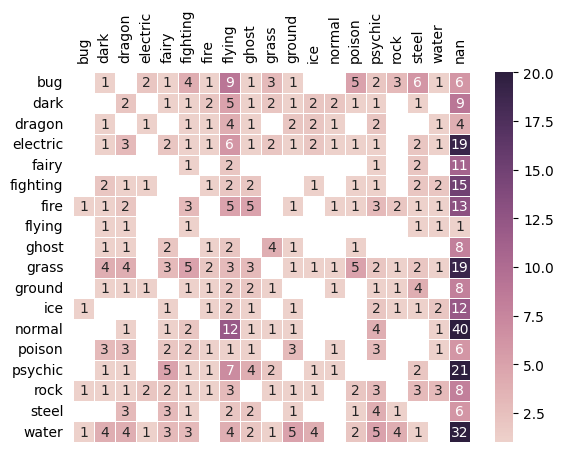

In [104]:
ax = sns.heatmap(type_distribution, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

This is workable, however a pokemon having the type Water/Ice has the exact same properties as one having Ice/Water. As such, we will reorganize the numbers so that the first type is always the first in alphabetical order. We will also move the signel type pokemon to the diagonal, effectively putting a pure Water into Water/Water. The result will be a map with the upper right populated.

In [105]:
type_distribution_sorted = copy(type_distribution)
types = type_distribution.drop(columns=[np.nan]).columns

for i, type1 in enumerate(types):
    type_distribution_sorted.loc[type1, type1] = type_distribution_sorted[np.nan][type1]
    for j, type2 in enumerate(types):
        if i <= j:
            break
        type_distribution_sorted.loc[type2, type1] = np.nan_to_num(type_distribution_sorted.loc[type2, type1]) + np.nan_to_num(type_distribution_sorted.loc[type1, type2])
        if type_distribution_sorted.loc[type2, type1] == 0:
            type_distribution_sorted.loc[type2, type1] = np.nan
        type_distribution_sorted.loc[type1, type2] = np.nan

type_distribution_sorted.drop(columns=[np.nan], inplace=True)
type_distribution_sorted

type2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,
bug,6.0,1.0,NaN,2.0,1.0,4.0,2.0,9.0,1.0,3.0,1.0,1.0,NaN,5.0,2.0,4.0,6.0,2.0
dark,NaN,9.0,3.0,1.0,1.0,3.0,3.0,6.0,2.0,6.0,2.0,2.0,2.0,4.0,2.0,1.0,1.0,4.0
dragon,NaN,NaN,4.0,4.0,NaN,2.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,3.0,3.0,1.0,3.0,5.0
electric,NaN,NaN,NaN,19.0,2.0,2.0,1.0,6.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
fairy,NaN,NaN,NaN,NaN,11.0,1.0,NaN,2.0,2.0,3.0,NaN,1.0,1.0,2.0,6.0,2.0,5.0,3.0
fighting,NaN,NaN,NaN,NaN,NaN,15.0,4.0,3.0,2.0,5.0,1.0,1.0,2.0,3.0,2.0,1.0,3.0,5.0
fire,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0,6.0,2.0,2.0,1.0,1.0,2.0,4.0,3.0,1.0,1.0
flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,2.0,12.0,1.0,7.0,3.0,3.0,5.0
ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,3.0,1.0,1.0,2.0,4.0,NaN,2.0,2.0


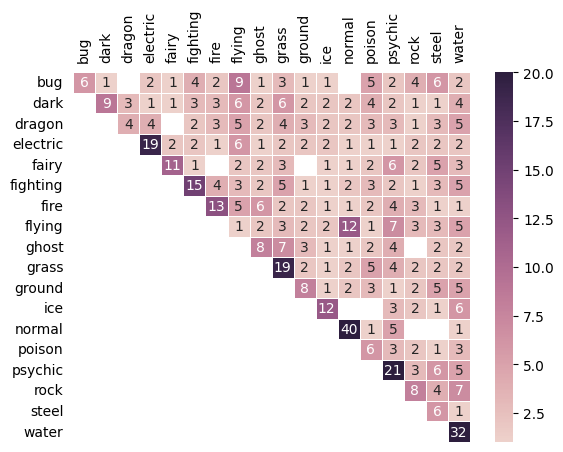

In [106]:
ax = sns.heatmap(type_distribution_sorted, vmin=1, vmax=20, annot=True, linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(left=False, top=False)

In [107]:
final_evos.loc[~final_evos['type2'].isna(), 'type_tuple'].value_counts().head(10)

type_tuple
(flying, normal)      12
(bug, flying)          9
(rock, water)          7
(flying, psychic)      7
(ghost, grass)         7
(electric, flying)     6
(ice, water)           6
(fairy, psychic)       6
(dark, flying)         6
(dark, grass)          6
Name: count, dtype: int64

## Type resistances and weaknesses

The table below display the attack type as a row and the defending type in the column.

Since we work with rows, we'll need to transpose it.

In [108]:
df_types

,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fighting,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
ice,1,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
fighting,2,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
poison,1,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
ground,1,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
flying,1,1.0,1.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,0.5,1.0


In [109]:
r_df_types = df_types.T
r_df_types

,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
against_normal,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
against_fire,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
against_water,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
against_electric,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
against_grass,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
against_ice,1.0,2.0,1.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
against_fighting,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
against_poison,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5
against_ground,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
against_flying,1.0,1.0,1.0,2.0,0.5,2.0,0.5,1.0,0.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0


In [110]:
r_df_types['normal']

against_normal      1.0
against_fire        1.0
against_water       1.0
against_electric    1.0
against_grass       1.0
against_ice         1.0
against_fighting    1.0
against_poison      1.0
against_ground      1.0
against_flying      1.0
against_psychic     1.0
against_bug         1.0
against_rock        0.5
against_ghost       0.0
against_dragon      1.0
against_dark        1.0
against_steel       0.5
against_fairy       1.0
Name: normal, dtype: float64

In [111]:
dual_type_matrix = pd.DataFrame(columns=df_types.columns)
dual_type_matrix.insert(loc=0, column='type_tuple', value=np.nan)
# dual_type_matrix.insert(loc=1, column='nb_pokemon', value=np.nan)

for type1 in r_df_types.columns:
    for type2 in r_df_types.columns:
        if type1 > type2:
            continue
        if type1 == type2:
            resistance = r_df_types[type1]
        else:
            resistance = r_df_types[type1] * r_df_types[type2]
        tuple = f'({type1}, {type2})'
        resistance.loc['type_tuple'] = tuple
        # resistance.loc['nb_pokemon'] = df_unique_types[ df_unique_types['type_tuple'] == tuple ]['name'].count()
        dual_type_matrix.loc[ len(dual_type_matrix.index) ] = resistance
dual_type_matrix

,type_tuple,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fighting,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,"(normal, normal)",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
1,"(normal, water)",1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.5,1.0,0.5,1.0
2,"(normal, poison)",1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.25,0.0,1.0,1.0,0.0,2.0
3,"(normal, psychic)",1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.5,1.0,0.5,0.0,1.0,0.0,0.25,1.0
4,"(normal, rock)",1.0,2.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,2.0,1.0,2.0,0.5,0.0,1.0,1.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"(fairy, psychic)",1.0,0.5,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,0.0,0.25,1.0
167,"(fairy, rock)",1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,2.0,2.0,0.25,1.0
168,"(fairy, ghost)",0.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0.5,1.0
169,"(fairy, steel)",1.0,0.25,0.5,0.5,1.0,2.0,2.0,0.5,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.25,2.0


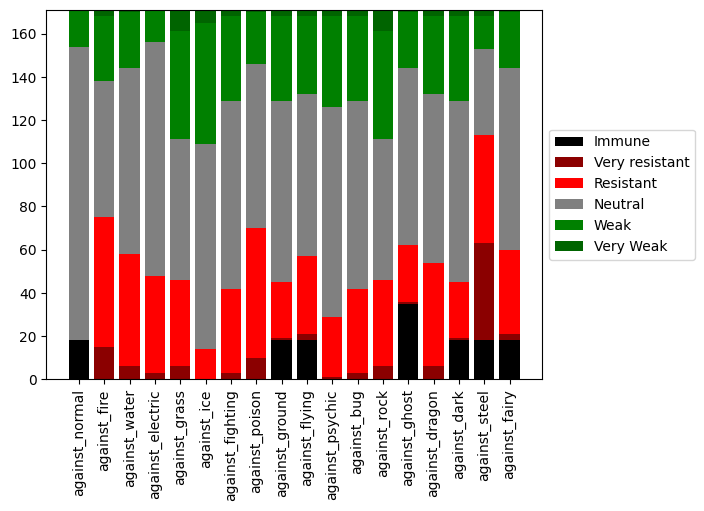

In [112]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = dual_type_matrix[type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()

In [113]:
df_resistances = copy(df_unique_types)
df_resistances = df_resistances.merge(dual_type_matrix, on='type_tuple')

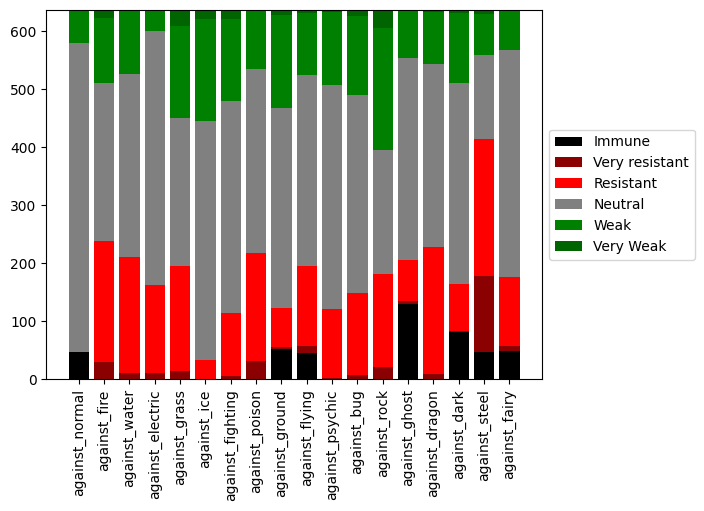

In [114]:
resistances = {
    0.0:    'Immune',
    0.25:   'Very resistant',
    0.5:    'Resistant',
    1.0:    'Neutral',
    2.0:    'Weak',
    4.0:    'Very Weak',
}
colors = [
    'black',
    'darkred',
    'red',
    'grey',
    'green',
    'darkgreen',
]

matrix = {}

for key, name in resistances.items():
    matrix[name] = []
    for type in df_types.columns:
        count = df_resistances.loc[ df_resistances['evo_is_final'] == 1, type].value_counts(ascending=False)
        if key in count:
            matrix[name].append(int(count[key]))
        else:
            matrix[name].append(0)

ground = [0] * 18
for color, values in zip(colors, matrix.values()):
    plt.bar(x=df_types.columns, height=values, bottom=ground, color=color)
    ground = [a + b for a,b in zip(ground, values)]            
    
plt.legend(resistances.values(), loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xticks(rotation=90)
plt.show()

# Number of pokemons per type

In [116]:
count_pokemons_per_type = {}

get_pokemon_by_types('normal')

for type in df_types.index:
    count_pokemons_per_type[type] = get_pokemon_by_types(type)['id'].count()
df = pd.DataFrame.from_dict(count_pokemons_per_type, orient='index', columns=['count'])
df['type'] = df.index
df
plt.figure(figsize=(15, 6))
sns.barplot(
    data = df,
    x = 'type',
    y = 'count',
    hue = 'type',
    palette=type_color_palette
)
capitalized_types = [a.capitalize() for a in df_types.index]
plt.xticks(labels=capitalized_types)
plt.xlabel('')
plt.ylabel('Number of Pokemons')
plt.title('Number of pokemons per type')
plt.show()

KeyError: 'type1'